
<img src="https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/hr_1920x480_s5WuoZs-thumbnail-1200x1200-70.jpg" >


Seu cliente é uma grande multinacional e possui nove setores verticais amplos em toda a organização. Um dos problemas que seu cliente enfrenta é identificar as pessoas certas para promoção (apenas para cargos de gerente e abaixo) e prepará-las a tempo. Atualmente o processo que eles seguem é:

1. Eles primeiro identificam um conjunto de funcionários com base em recomendações/desempenho passado
Os funcionários selecionados passam por um programa de treinamento e avaliação separado para cada vertical. Esses programas são baseados nas habilidades exigidas de cada vertical

2. Ao final do programa, com base em vários fatores como desempenho do treinamento, conclusão de KPI (somente funcionários com KPIs concluídos superiores a 60% são considerados) etc., o funcionário recebe promoção

3. Para o processo acima mencionado, as promoções finais só são anunciadas após a avaliação e isto leva a atrasos na transição para as suas novas funções. Portanto, a empresa precisa da sua ajuda para identificar os candidatos elegíveis em um determinado ponto de verificação para que possam agilizar todo o ciclo de promoção.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/wns_hack_im_1.jpg" alt="hack.jpg" width='620px'>

Eles forneceram vários atributos sobre o desempenho passado e atual do funcionário, juntamente com dados demográficos. Agora, a tarefa é prever se um potencial promovido no ponto de verificação do conjunto de teste será promovido ou não após o processo de avaliação.


| Variável                 | Definição                                                             |
|--------------------------|-----------------------------------------------------------------------|
| employee_id          | ID exclusivo para funcionário                                         |
| departament             | Departamento de funcionário                                            |
| region                   | Região de emprego (não ordenada)                                      |
| education                 | Nível de educação                                                     |
| gender                   | Gênero do Funcionário                                                  |
| recruitment_channel       | Canal de recrutamento para funcionário                                 |
| no_of_trainings          | Número de treinamentos concluídos no ano anterior em habilidades interpessoais, habilidades técnicas, etc. |
| age                    | Idade do Funcionário                                                   |
| previous_year_rating | Avaliação do funcionário no ano anterior                              |
| length_of_service         | Tempo de serviço em anos                                               |
| KPIs_met >80%        | Se Porcentagem de KPIs (indicadores-chave de desempenho) >80% então 1, senão 0 |
| awards_won?          | Se os prêmios conquistados no ano anterior então 1, senão 0          |
| avg_training_score       | Pontuação média nas avaliações de treinamento atuais                  |
| is_promoted              | (Alvo) Recomendado para promoção                                      |

Fonte: https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#ProblemStatement

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv('train_LZdllcl.csv')
dados_teste = pd.read_csv("test_2umaH9m.csv")
dados_amostra = pd.read_csv("sample_submission_M0L0uXE.csv")
dados.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
dados.shape

(54808, 14)

In [ ]:
dados_teste.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
dados_amostra.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [ ]:
dados_teste['is_promoted'] = 2

In [ ]:
dados = pd.concat([dados, dados_teste], ignore_index=True, axis='rows')

In [ ]:
dados.shape

(78298, 14)

In [ ]:
dados.isna().sum()

employee_id                0
department                 0
region                     0
education               3443
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
dados.duplicated().sum()

0

In [ ]:
dados.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [ ]:
dados.previous_year_rating.value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [ ]:
dados.education.value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [ ]:
dados.department.value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [ ]:
dados.region.value_counts()

region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64

In [ ]:
dados.gender.value_counts()

m    55092
f    23206
Name: gender, dtype: int64

In [ ]:
dados.recruitment_channel.value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [ ]:
def describe_numeric(column_name, bins = "auto"):
    print(dados[column_name].describe())

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title(f"Boxplot {column_name}")
    sns.boxplot(data=dados[column_name], orient='h')

    plt.subplot(1,2,2)
    plt.title(f"Histograma {column_name}")
    sns.histplot(data=dados[column_name], kde=True, bins=10)


count    78298.000000
mean         1.253378
std          0.606766
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: no_of_trainings, dtype: float64


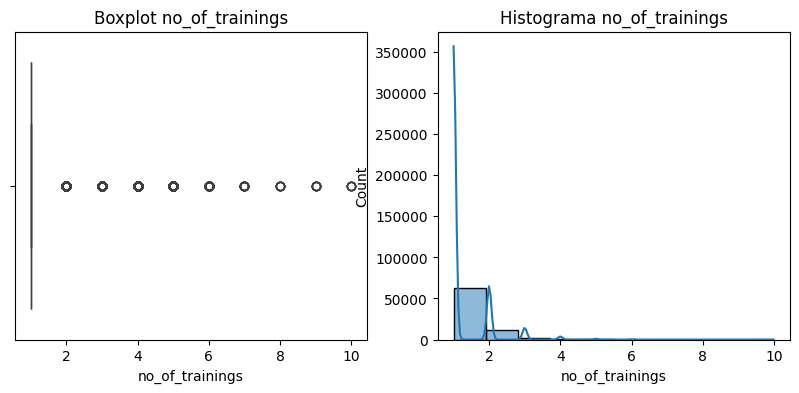

In [ ]:
describe_numeric('no_of_trainings')

In [ ]:
std = dados.no_of_trainings.std()
median = dados.no_of_trainings.median()
print("Total de Outliers de 'no_of_trainings':", dados.no_of_trainings[dados.no_of_trainings > median + (std * 2)].count())

Total de Outliers de 'no_of_trainings': 3461


count    78298.000000
mean        34.797619
std          7.665928
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64


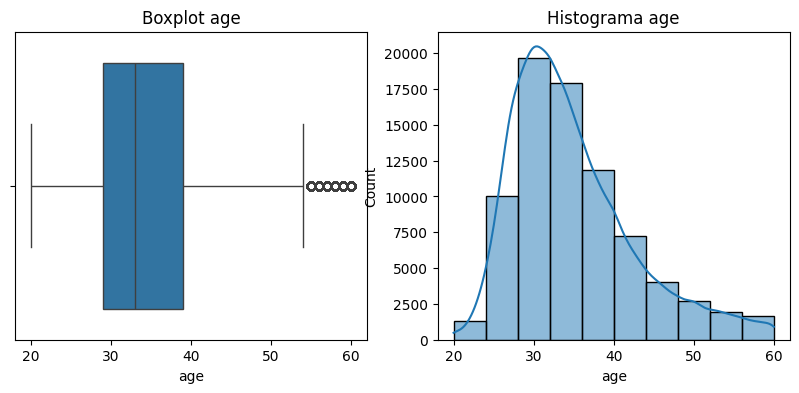

In [ ]:
describe_numeric('age')

count    72362.000000
mean         3.332219
std          1.260982
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64


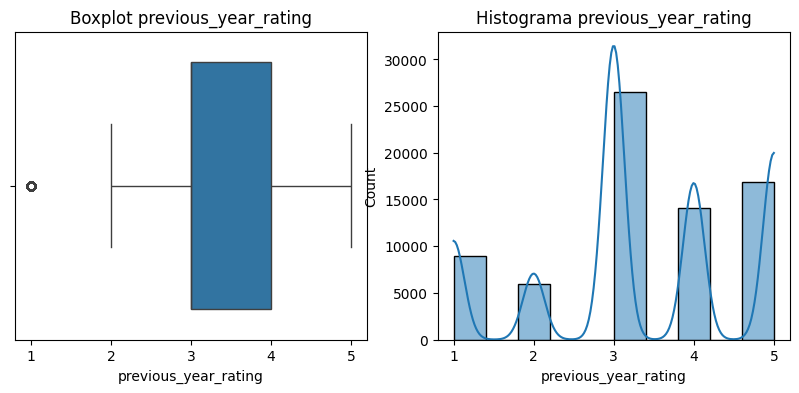

In [ ]:
describe_numeric('previous_year_rating')

count    78298.000000
mean         5.848974
std          4.248070
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64


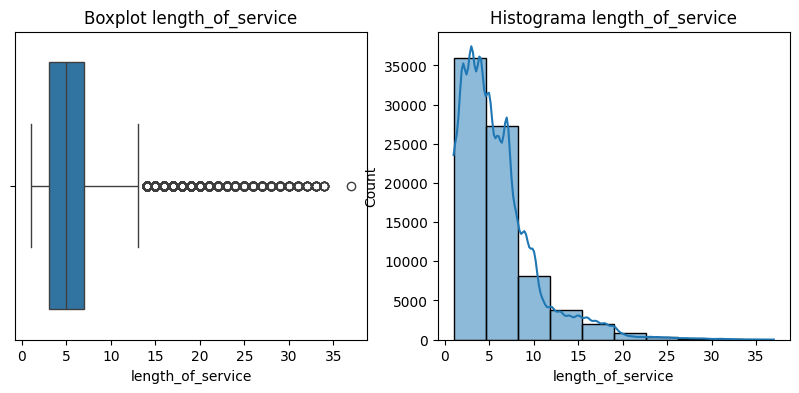

In [ ]:
describe_numeric('length_of_service')

<Axes: xlabel='KPIs_met >80%', ylabel='count'>

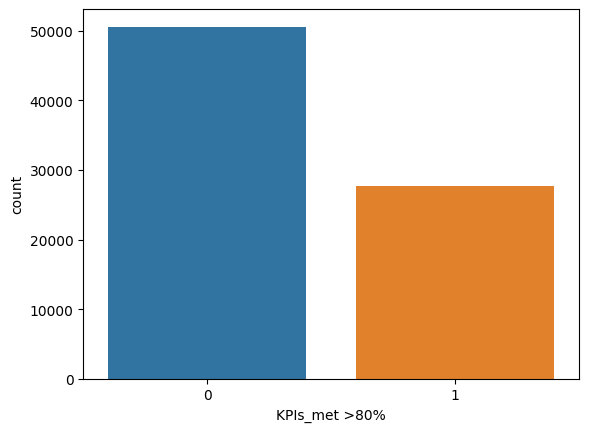

In [ ]:
sns.countplot(data=dados, x='KPIs_met >80%', hue='KPIs_met >80%', legend=False)

<Axes: xlabel='awards_won?', ylabel='count'>

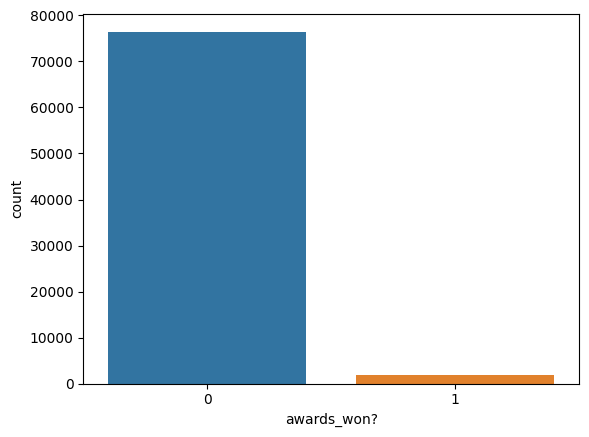

In [ ]:
sns.countplot(data=dados, x='awards_won?', hue='awards_won?', legend=False)

count    78298.000000
mean        63.349664
std         13.383664
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64


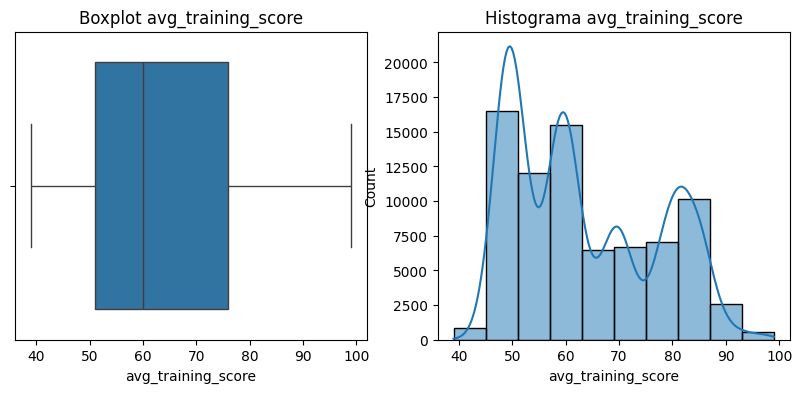

In [ ]:
describe_numeric("avg_training_score")

<Axes: xlabel='recruitment_channel', ylabel='count'>

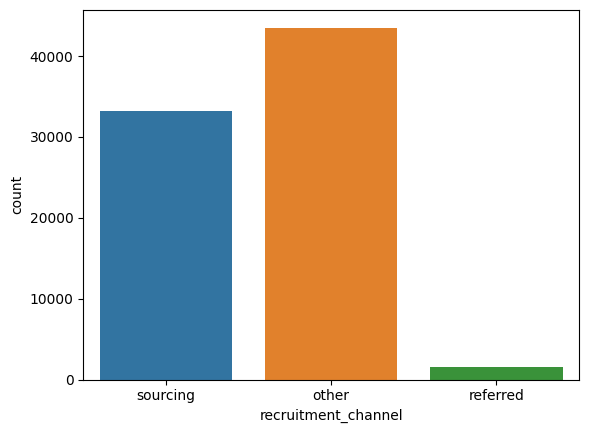

In [ ]:
sns.countplot(data=dados, x='recruitment_channel', hue='recruitment_channel', legend=False)

<Axes: xlabel='is_promoted', ylabel='count'>

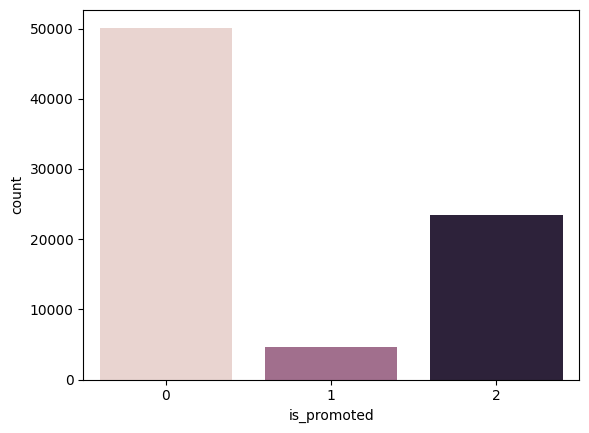

In [ ]:
sns.countplot(data=dados, x='is_promoted', hue='is_promoted', legend=False)

In [ ]:
dados.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
# remove a coluna 'employee_id'
dados.drop(columns=['employee_id'], inplace=True)

In [ ]:
# preenche com "Unknown"  a coluna "education" os valores nulos
dados.education.fillna('Unknown',inplace=True)

In [ ]:
# preenche com zero "previous_year_rating" considerando que não tiveram pontuação no ano anterior
dados.previous_year_rating.fillna(0, inplace=True)

In [ ]:
# preenche com 0 para f e 1 para m, a coluna "gender"
dados['gender'] = dados.gender.apply(lambda x : 0 if x == 'f' else 1 if x == 'm' else x)

In [ ]:
import re

def trat_category_name(category):
    category = category.lower()
    padrao = '[^a-z0-9]'
    category = re.sub(padrao, repl="", string=category)
    return category

In [ ]:
dados.department = dados.department.apply(trat_category_name)
dados.education = dados.education.apply(trat_category_name)
dados.recruitment_channel = dados.recruitment_channel.apply(trat_category_name)

In [ ]:
dados.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,salesmarketing,region_7,mastersabove,0,sourcing,1,35,5.0,8,1,0,49,0
1,operations,region_22,bachelors,1,other,1,30,5.0,4,0,0,60,0
2,salesmarketing,region_19,bachelors,1,sourcing,1,34,3.0,7,0,0,50,0
3,salesmarketing,region_23,bachelors,1,other,2,39,1.0,10,0,0,50,0
4,technology,region_26,bachelors,1,other,1,45,3.0,2,0,0,73,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['department','education', 'recruitment_channel']
ohe = OneHotEncoder(drop='first', dtype='uint8')
ohe_dados = ohe.fit_transform(dados[categorical_columns])

df_encoded = pd.DataFrame(data=ohe_dados.toarray(), columns=ohe.get_feature_names_out())

df_final = pd.concat([dados.drop(columns=categorical_columns), df_encoded], axis='columns')

df_final.drop(columns=['region'], inplace=True)

df_final

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_finance,...,department_operations,department_procurement,department_rd,department_salesmarketing,department_technology,education_belowsecondary,education_mastersabove,education_unknown,recruitment_channel_referred,recruitment_channel_sourcing
0,0,1,35,5.0,8,1,0,49,0,0,...,0,0,0,1,0,0,1,0,0,1
1,1,1,30,5.0,4,0,0,60,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1,34,3.0,7,0,0,50,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,2,39,1.0,10,0,0,50,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,1,1,24,3.0,1,0,0,61,2,0,...,0,0,0,0,0,1,0,0,0,1
78294,1,1,31,3.0,7,0,0,74,2,0,...,0,0,0,0,1,0,0,0,0,1
78295,0,1,26,4.0,4,0,0,50,2,0,...,0,0,0,0,0,0,0,0,0,1
78296,1,3,27,0.0,1,0,0,70,2,0,...,0,1,0,0,0,0,0,0,0,1


<ipython-input-22-ae89f3174f35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr()*100, cmap='rocket_r', annot=True)


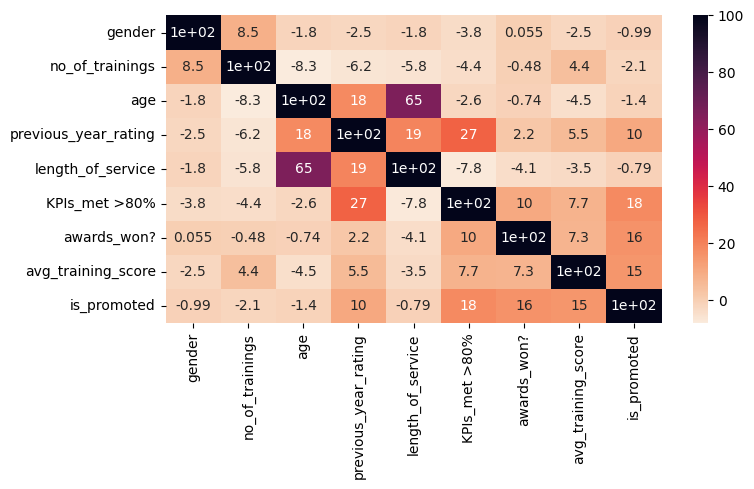

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(dados.corr()*100, cmap='rocket_r', annot=True)
plt.show()

In [ ]:
# separa os dados de validação
x_dados = df_final[:54808]
x_validation = df_final[54808:]

x_validation = x_validation.drop(columns=['is_promoted'])
y_validation = dados_amostra['is_promoted']


In [ ]:
y_dados = x_dados['is_promoted']
x_dados = x_dados.drop(columns=['is_promoted'])


In [ ]:
#Balanceamento dos dados
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_dados, y_dados = smote.fit_resample(x_dados, y_dados)

In [ ]:
# dados de treino e teste
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_dados, y_dados, test_size=0.2, random_state=7)

## Seleção de features



In [ ]:
from xgboost import XGBClassifier

modelo = XGBClassifier(random_state=7)

modelo.fit(x_train, y_train)

df_feat_importance_xgbc = pd.DataFrame(data=modelo.feature_importances_, index=x_train.columns).sort_values(by=0, ascending=False)*100



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier(random_state=7)

modelo.fit(x_train, y_train)

df_feat_importance_extratree = pd.DataFrame(data=modelo.feature_importances_, index=x_train.columns).sort_values(by=0, ascending=False)*100



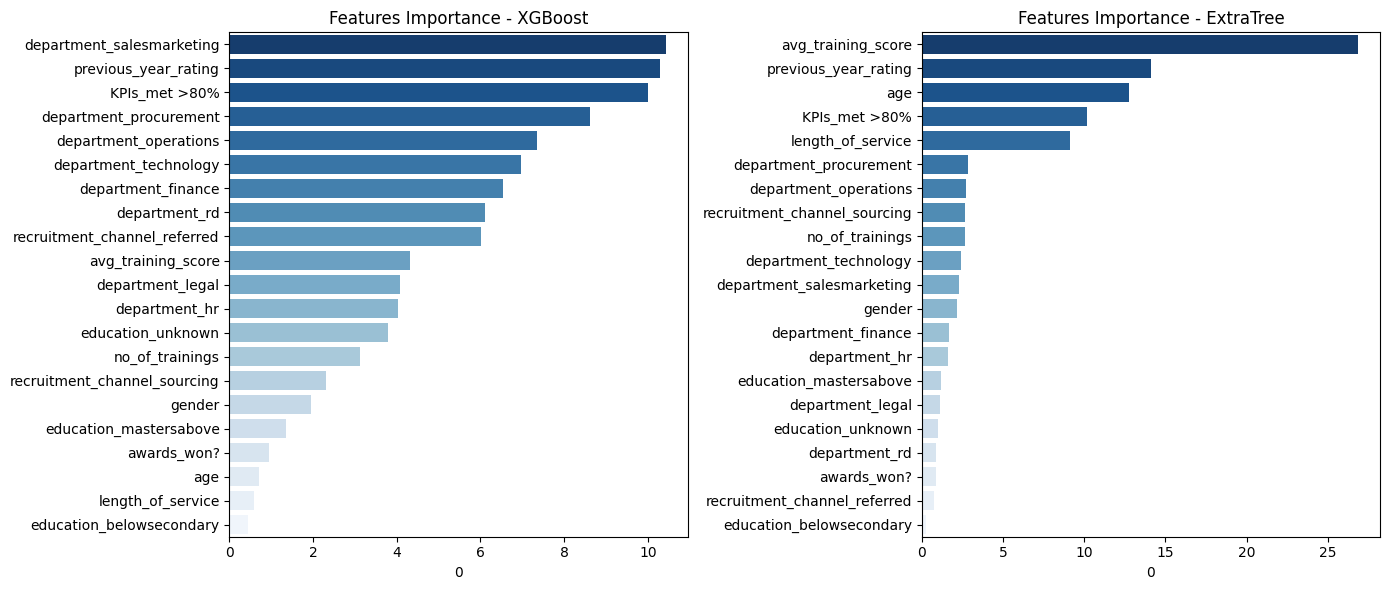

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.title("Features Importance - XGBoost")
sns.barplot(x=df_feat_importance_xgbc[0], y=df_feat_importance_xgbc.index, hue=df_feat_importance_xgbc.index, palette='Blues_r')
plt.ylabel(None)

plt.subplot(1, 2, 2)
plt.title("Features Importance - ExtraTree")
sns.barplot(x=df_feat_importance_extratree[0], y=df_feat_importance_extratree.index, hue=df_feat_importance_extratree.index, palette='Blues_r')
plt.ylabel(None)

plt.tight_layout()
plt.show()

### Modelo baseline

In [ ]:
from sklearn import metrics

def evaluate_model(y_real, y_predict):
    print(f"f1_score: {metrics.f1_score(y_real, y_predict)*100:.2f}")
    print(f"Acuracia: {metrics.accuracy_score(y_real, y_predict)*100:.2f}")
    # print(f"Confusion Matrix\n{metrics.confusion_matrix(y_real, y_predict)}")
    # print(f"ROC AUC: {metrics.roc_auc_score(y_real, y_predict)*100:.2f}")
    print(f"Classification Report\n{metrics.classification_report(y_real, y_predict)}")


In [ ]:
from xgboost import XGBClassifier

for param in [1]:
    modelo = XGBClassifier()#random_state=7, max_depth=36, n_estimators=973)

    modelo.fit(x_train, y_train)

    y_predic_test = modelo.predict(x_test)

    print("\n\nAvaliação modelo com dados de TESTE")
    print(param)
    evaluate_model(y_test, y_predic_test)




Avaliação modelo com dados de TESTE
1
f1_score: 90.17
ROC AUC: 90.02
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     10055
           1       0.89      0.92      0.90     10001

    accuracy                           0.90     20056
   macro avg       0.90      0.90      0.90     20056
weighted avg       0.90      0.90      0.90     20056



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

lista_modelos = {
    "ExtraTreesClassifier" : ExtraTreesClassifier(random_state=7, max_depth=36),
    "RandomForestClassifier" : RandomForestClassifier(random_state=8),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=2),
}

for nome, modelo in lista_modelos.items():
    modelo.fit(x_train, y_train)

    y_pred = modelo.predict(x_test)

    print(f"\n\n===== {nome}")
    evaluate_model(y_test, y_pred)



===== ExtraTreesClassifier
f1_score: 94.25
ROC AUC: 94.19
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10055
           1       0.93      0.96      0.94     10001

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056



===== RandomForestClassifier
f1_score: 94.49
ROC AUC: 94.43
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     10055
           1       0.93      0.96      0.94     10001

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056



===== KNeighborsClassifier
f1_score: 91.30
ROC AUC: 91.15
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.89      0.91

### Modelo definitivo

In [ ]:
# hipertunning
from xgboost import XGBClassifier

for param in range(100, 4000, 100):
    modelo = XGBClassifier(random_state=7, max_depth=30, n_estimators=param)

    modelo.fit(x_train, y_train)

    y_predic_test = modelo.predict(x_test)

    print("\n\nAvaliação modelo XGBoost")

    evaluate_model(y_test, y_predic_test)


In [ ]:
# analise se as features influenciam na acuracia
from xgboost import XGBClassifier

cols = df_feat_importance_extratree.index

modelo = XGBClassifier(random_state=7, max_depth=30, n_estimators=3300)

modelo.fit(x_train[cols], y_train)

y_predic_test = modelo.predict(x_test[cols])

print("\n\nAvaliação modelo XGBoost com features na ordem do modelo ExtraTreesClass")
# print(col)
evaluate_model(y_test, y_predic_test)




Avaliação modelo XGBoost com features na ordem do modelo ExtraTreesClass
f1_score: 94.92
ROC AUC: 94.88
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10055
           1       0.94      0.96      0.95     10001

    accuracy                           0.95     20056
   macro avg       0.95      0.95      0.95     20056
weighted avg       0.95      0.95      0.95     20056



### Validação do modelo, com dados de validação

In [ ]:
y_predic_val = modelo.predict(x_validation[cols])

print("\nValidação do modelo XGBoost")
evaluate_model(y_validation, y_predic_val)


Validação do modelo XGBoost
f1_score: 0.00
Acuracia: 90.24
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     23490
           1       0.00      0.00      0.00         0

    accuracy                           0.90     23490
   macro avg       0.50      0.45      0.47     23490
weighted avg       1.00      0.90      0.95     23490



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x_validation.shape

(23490, 21)

### Salvar arquivo de solução

In [ ]:
df_solution = dados_amostra.copy()
df_solution['is_promoted'] = y_predic_val

In [ ]:
df_solution.to_csv("solution_analytics_hackathon_2024_fev_21.csv", index=False)